In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math

import seaborn as sns
sns.set()

In [0]:
#Cargamos los archivos desde el panel izquierdo y después corremos este código
resistencias=[564 ,564	,566	,562	,560	,563	,568	,563	,563	,563	,565	,562	,565	,564	,565	,100	]
err_R=[2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1]
sensdata = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] 
data = []
for i in sensdata:
  data.append(np.loadtxt('cal_s{}'.format(i)))


In [0]:
data = np.loadtxt('cal_s0')
databis = np.loadtxt('S0_bis')

In [0]:
def fuerza(volt):
  a=26.74#26.78885525
  b=-67.4 #-67.40046261
  sigma_a=0.01 #0.05
  sigma_b=0.02 #0.05
  f = a*volt + b
  return f

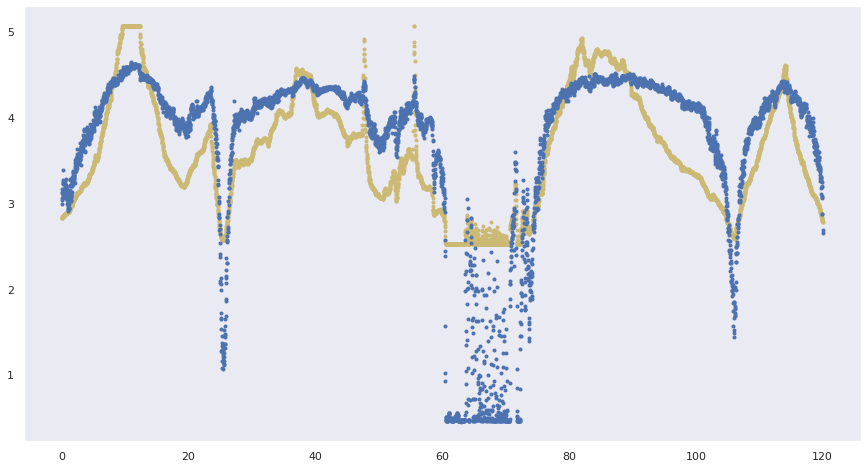

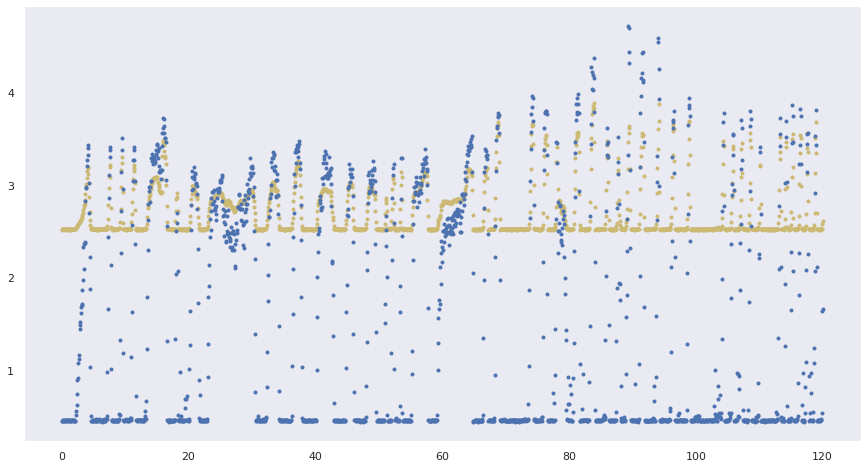

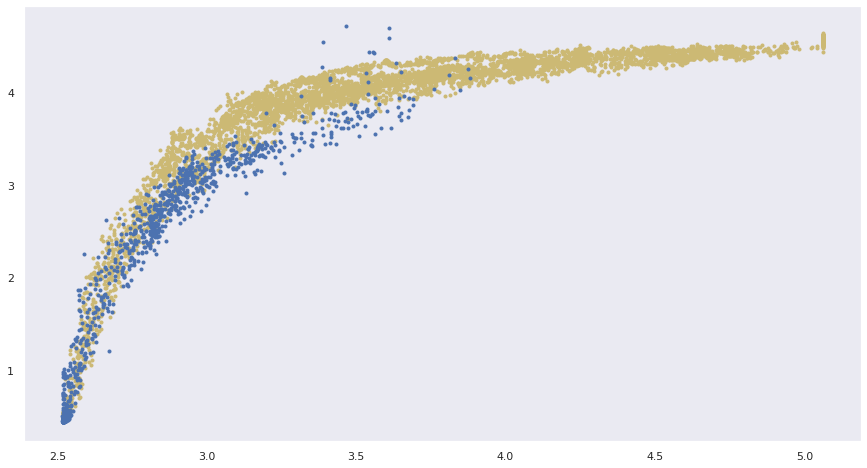

In [14]:
ini = 0
fin = len(data[:,0])

plt.figure(figsize=(15,8))
plt.plot(data[:,0],data[:,1],'y.')
plt.plot(data[:,0],data[:,2],'b.')
plt.grid()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(databis[ini:fin,0],databis[ini:fin,1],'y.')
plt.plot(databis[ini:fin,0],databis[ini:fin,2],'b.')
plt.grid()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(data[:,1],data[:,2],'y.')
plt.plot(databis[:,1],databis[:,2],'b.')
plt.grid()
plt.show()

In [0]:
#Tiempo=[]
Fuerza_V = []
Voltaje_S = []
Lectura_S=[]
err_S = 0.143

for i in range(16):
  F = fuerza(data[i][:,1])
  V = data[i][:,2]
  V_S, F_V =[], []
  for j in range(len(F)):
    
    if F[j] <= 50.:
      V_S.append(V[j])
      F_V.append(F[j])
  Voltaje_S.append(V_S)
  Lectura_S.append(np.round(np.array(V_S)*1023.0/5.0))
  Fuerza_V.append(F_V)

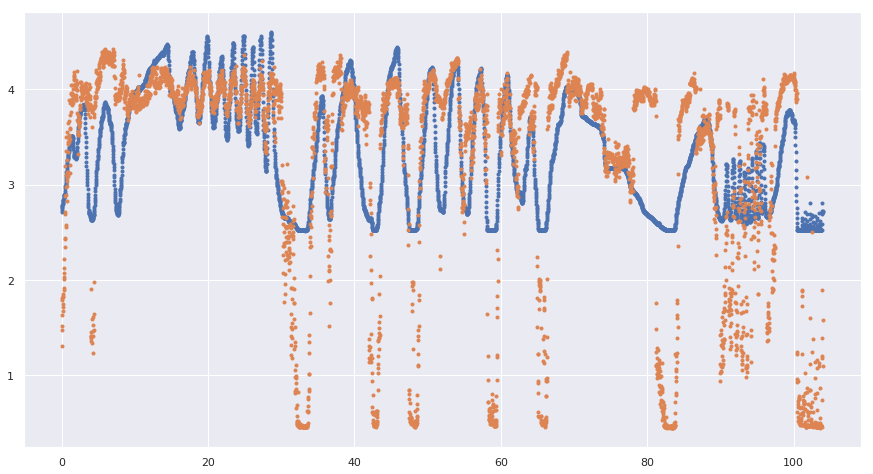

In [0]:
ini = 0
fin = 5200
plt.figure(figsize=(15,8))
plt.plot(data[6][ini:fin,0],data[6][ini:fin,1],'.')
plt.plot(data[6][ini:fin,0],data[6][ini:fin,2],'.')

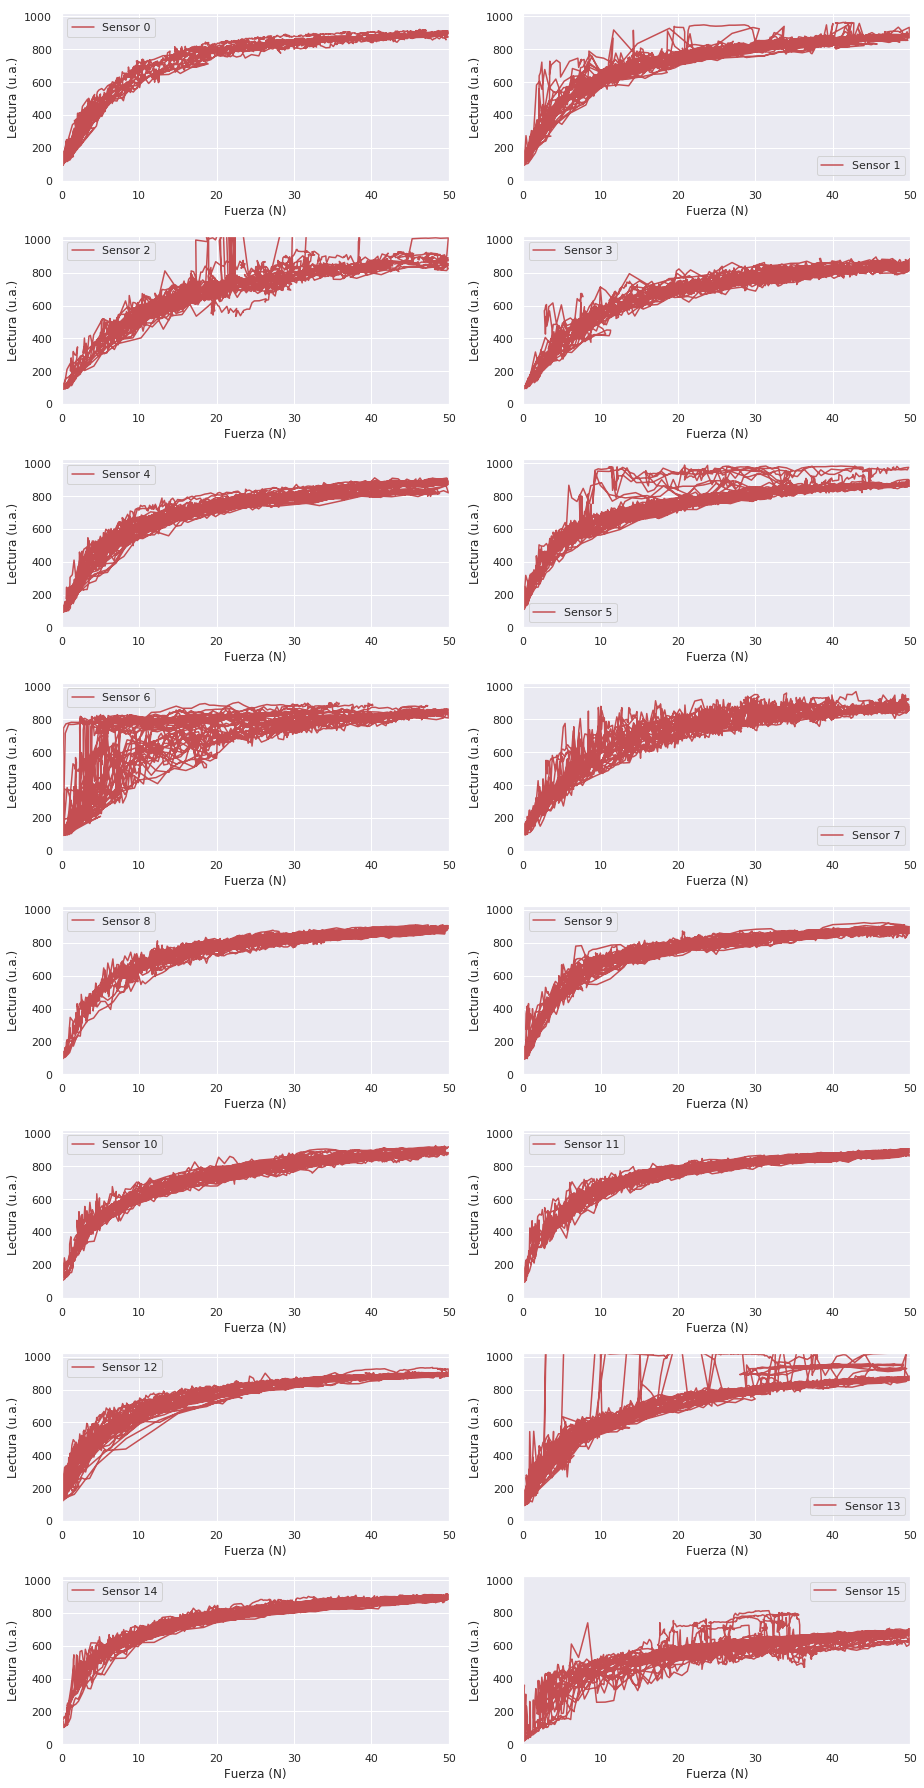

In [0]:

label=['Sensor 0','Sensor 1','Sensor 2','Sensor 3','Sensor 4','Sensor 5',
       'Sensor 6','Sensor 7','Sensor 8','Sensor 9','Sensor 10','Sensor 11',
       'Sensor 12','Sensor 13','Sensor 14','Sensor 15']


plt.figure(figsize=(13,25))
for i in range(16):
  plt.subplot(8,2,i+1)
  plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r', label=label[i])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1023)
  plt.legend()
  plt.tight_layout()
plt.grid()
plt.show()

In [0]:
#Reordena por orden de Fuerza los datos ;)

def takeFirst(elem):
    return elem[0]

def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

In [0]:
def sliding_median(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))

        med = np.median([data_array[j] for j in indices])
        new_list.append(med)

    return new_list
  
def sliding_mean(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list

In [0]:
label=['Sensor 0','Sensor 1','Sensor 2','Sensor 3','Sensor 4','Sensor 5',
       'Sensor 6','Sensor 7','Sensor 8','Sensor 9','Sensor 10','Sensor 11',
       'Sensor 12','Sensor 13','Sensor 14','Sensor 15']

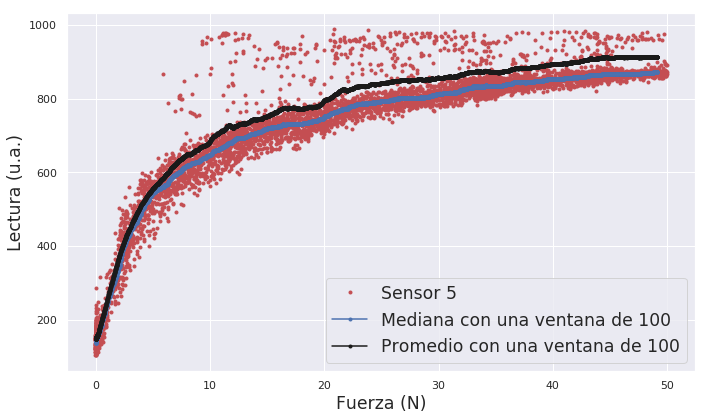

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:461: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


29.738682826159973


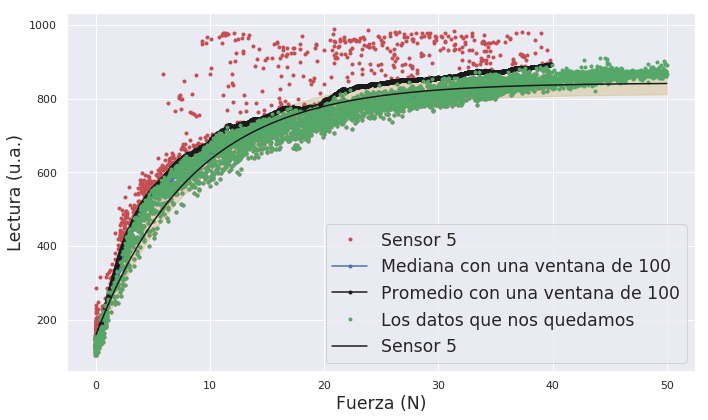

"\nplt.figure(figsize=(10,6))\n#plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r', label=label[i])\nplt.plot(Fv[ini:fin], Vs[ini:fin], 'r.', label=label[i])\nplt.plot(Fv_median[ini:fin], Vs_median[ini:fin], 'b.-', label='Mediana con una ventana de '+str(ventana))\nplt.plot(Fv_s6[ini:fin], Vs_s6[ini:fin], 'g.', label='Los datos que nos quedamos')\nplt.xlabel('Fuerza (N)', fontsize='x-large')\nplt.ylabel('Lectura (u.a.)', fontsize='x-large')\nplt.axvline(corte6)\nplt.grid()\n#plt.xlim(0,50)\n#plt.ylim(0,1023)\nplt.legend(fontsize='x-large')\nplt.tight_layout()\nplt.grid()\nplt.show()\n"

In [0]:
# Analisis para el S5: división de datos y ploteo
lista_aux = [] #Me creo esta lista auxiliar para ordenar respecto de la primer variable
i=5
for j in range(len(Fuerza_V[i])):
  lista_aux.append([Fuerza_V[i][j] , Lectura_S[i][j]])
  
#lista_aux
sortedList = sorted(lista_aux, key=takeFirst)
#print(sortedList)

#Reacomoda para cada variable ordenada según la fuerza (Fv) en listas separadas:
Fv, Vs = [], []

for j in range(len(sortedList)):
  Fv.append(sortedList[j][0])
  Vs.append(sortedList[j][1])

ventana = 100
Fv_median, LAB1 = sliding_median(Fv,ventana), 'Mediana con una ventana de '+str(ventana)
Vs_median = sliding_median(Vs,ventana)

Fv_mean, LAB2 = sliding_mean(Fv,ventana), 'Promedio con una ventana de '+str(ventana)
Vs_mean = np.array(sliding_mean(Vs,ventana))*1.04

ini = 0
fin = len(Fv) #(es el total de datos que tenemo)

"""
plt.figure(figsize=(15,8))
plt.plot(data[i][ini:fin,0],data[i][ini:fin,1],'.')
plt.plot(data[i][ini:fin,0],data[i][ini:fin,2],'.')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Voltaje (V)')
plt.show()
"""

plt.figure(figsize=(10,6))
#plt.subplot(8,2,i+1)
#plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r', label=label[i])
plt.plot(Fv[ini:fin], Vs[ini:fin], 'r.', label=label[i])
plt.plot(Fv_median[ini:fin], Vs_median[ini:fin], 'b.-', label=LAB1)
plt.plot(Fv_mean[ini:fin], Vs_mean[ini:fin], 'k.-', label=LAB2)
plt.xlabel('Fuerza (N)', fontsize='x-large')
plt.ylabel('Lectura (u.a.)', fontsize='x-large')
plt.grid()
#plt.xlim(0,50)
#plt.ylim(0,1023)
plt.legend(fontsize='x-large')
plt.tight_layout()
plt.grid()
plt.show()
# Divido los datos entre las "dos poblaciones"
"""

"""
    
Fv_s5, Vs_s5 = [], []
#corte5 = 7
for j in range(len(Fv_mean)):
  if (Vs[j] < Vs_mean[j]): #and Fv_mean[j] >= corte5): #hasta que la fuerza valga "corte", después tomamos todos los datos
    Vs_s5.append(Vs[j])
    Fv_s5.append(Fv[j])
  #if Fv[j] < corte5:
   # Vs_s5.append(Vs[j])
    #Fv_s5.append(Fv[j])

parametros_s5, covarianza_s5 = [], []

popt, pcov = curve_fit(expo, Fv_s5, Vs_s5, p0=[  0,   5,  2], sigma=err_S*np.ones(len(Vs_s5)))#p0=[0, 0.3],
d,e,f=popt[0], popt[1], popt[2]
parametros_s5.append([d,e,f])
covarianza_s5.append(pcov)
  

xp=np.linspace(0,50,1001)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))

"""
banda_u = []
banda_l = []

#for j in range(16):
banda_u_aux = []
banda_l_aux = []
for k in range(len(xp)):
  yp[k],sigma_yp[k]=prediccion_exp(xp[k],0.1,parametros_s5[0],covarianza_s5[0])
  banda_u_aux.append(yp[k]+sigma_yp[k])
  banda_l_aux.append(yp[k]-sigma_yp[k])
banda_u.append(banda_u_aux)
banda_l.append(banda_l_aux)
"""

errs5 = []
for j in range(len(Vs_s5)):
  y_pred = expo(Fv_s5[j] ,parametros_s5[0][0],parametros_s5[0][1],parametros_s5[0][2])
  errs5.append((Vs_s5[j] - y_pred)**2)
  #print(y_pred)

err_s5 = np.sqrt(sum(errs5)/(len(Vs_s5)-1))
print(err_s5)    
    
ini = 0
fin = len(Fv_s5) #(es el total de datos que tenemo)
pred_s5 = expo(xp,parametros_s5[0][0],parametros_s5[0][1],parametros_s5[0][2])
err_up_s5 = pred_s5 + err_s5
err_low_s5 = pred_s5 - err_s5

plt.figure(figsize=(10,6))
#plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r', label=label[i])
plt.plot(Fv[ini:fin], Vs[ini:fin], 'r.', label=label[i])
plt.plot(Fv_median[ini:fin], Vs_median[ini:fin], 'b.-', label='Mediana con una ventana de '+str(ventana))
plt.plot(Fv_mean[ini:fin], Vs_mean[ini:fin], 'k.-', label=LAB2)
plt.plot(Fv_s5[ini:fin], Vs_s5[ini:fin], 'g.', label='Los datos que nos quedamos')
plt.plot(xp, pred_s5, 'k-', label=label[i])
plt.fill_between(xp, err_low_s5, err_up_s5, color='y', alpha=0.4)
plt.xlabel('Fuerza (N)', fontsize='x-large')
plt.ylabel('Lectura (u.a.)', fontsize='x-large')
#plt.axvline(corte5)
plt.grid()
#plt.xlim(0,50)
#plt.ylim(0,1023)
plt.legend(fontsize='x-large')
plt.tight_layout()
plt.grid()
plt.show()

"""
plt.figure(figsize=(10,6))
#plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r', label=label[i])
plt.plot(Fv[ini:fin], Vs[ini:fin], 'r.', label=label[i])
plt.plot(Fv_median[ini:fin], Vs_median[ini:fin], 'b.-', label='Mediana con una ventana de '+str(ventana))
plt.plot(Fv_s6[ini:fin], Vs_s6[ini:fin], 'g.', label='Los datos que nos quedamos')
plt.xlabel('Fuerza (N)', fontsize='x-large')
plt.ylabel('Lectura (u.a.)', fontsize='x-large')
plt.axvline(corte6)
plt.grid()
#plt.xlim(0,50)
#plt.ylim(0,1023)
plt.legend(fontsize='x-large')
plt.tight_layout()
plt.grid()
plt.show()
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


70.97764187204398


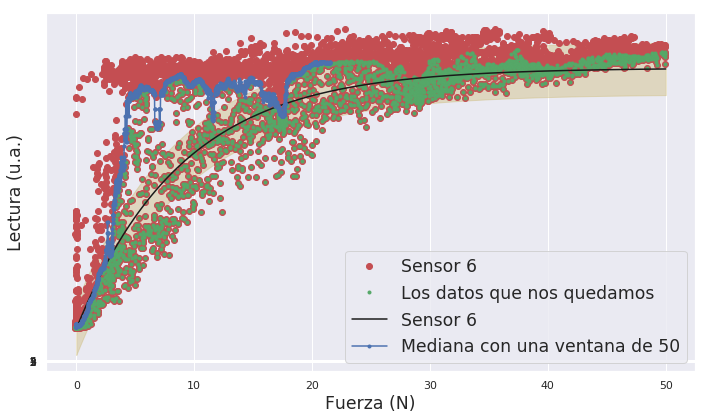

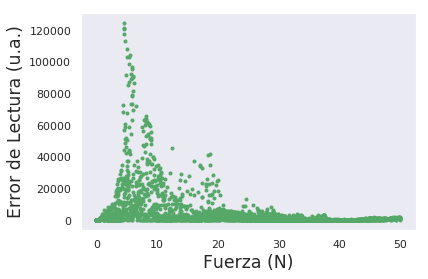

In [0]:
lista_aux = []
ventana = 50
i=6
for j in range(len(Fuerza_V[i])):
  lista_aux.append([Fuerza_V[i][j] , Lectura_S[i][j]])
  
#lista_aux
sortedList = sorted(lista_aux, key=takeFirst)
#print(sortedList)

#Reacomoda para cada variable ordenada según la fuerza (Fv) en listas separadas:
Fv, Vs = [], []

for j in range(len(sortedList)):
  Fv.append(sortedList[j][0])
  Vs.append(sortedList[j][1])

Fv_median, LAB1 = sliding_median(Fv,ventana), 'Mediana con una ventana de '+str(ventana)
Vs_median = sliding_median(Vs,ventana)

Fv_mean, LAB2 = sliding_mean(Fv,ventana), 'Promedio con una ventana de '+str(ventana)
Vs_mean = np.array(sliding_mean(Vs,ventana))*1.04

Fv_s6, Vs_s6 = [], []
corte6 = 30
for j in range(len(Fv_median)):
  if (Vs[j] < Vs_median[j]):# and Fv_median[j]<corte6): #hasta que la fuerza valga "corte", después tomamos todos los datos
    Vs_s6.append(Vs[j])
    Fv_s6.append(Fv[j])
  #if Fv[j] >= corte6:
   # Vs_s6.append(Vs[j])
    #Fv_s6.append(Fv[j])

parametros_s6, covarianza_s6 = [], []

#err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
popt, pcov = curve_fit(expo, Fv_s6, Vs_s6, p0=[  0,   5,  2], sigma=err_S*np.ones(len(Vs_s6)))#p0=[0, 0.3],
d,e,f=popt[0], popt[1], popt[2]
parametros_s6.append([d,e,f])
covarianza_s6.append(pcov)
  
xp=np.linspace(0,50,1001)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))

"""
banda_u = []
banda_l = []

#for j in range(16):
banda_u_aux = []
banda_l_aux = []
for k in range(len(xp)):
  yp[k],sigma_yp[k]=prediccion_exp(xp[k],0.1,parametros_s6[0],covarianza_s6[0])
  banda_u_aux.append(yp[k]+sigma_yp[k])
  banda_l_aux.append(yp[k]-sigma_yp[k])
banda_u.append(banda_u_aux)
banda_l.append(banda_l_aux)
"""

errs6 = []
for j in range(len(Vs_s6)):
  y_pred = expo(Fv_s6[j] ,parametros_s6[0][0],parametros_s6[0][1],parametros_s6[0][2])
  errs6.append((Vs_s6[j] - y_pred)**2)
  #print(y_pred)

err_s6 = np.sqrt(sum(errs6)/(len(Vs_s6)-1))
print(err_s6)

ini, fin = 0, len(Fv_s6)#5884 #(es el total de datos que tenemo)
pred_s6 = expo(xp,parametros_s6[0][0],parametros_s6[0][1],parametros_s6[0][2])
err_up_s6 = pred_s6 + err_s6
err_low_s6 = pred_s6 - err_s6

plt.figure(figsize=(10,6))
plt.plot(Fv[:], Vs[:], 'ro', label=label[i])
plt.plot(Fv_s6[:], Vs_s6[:], 'g.', label='Los datos que nos quedamos')
plt.plot(xp, pred_s6, 'k-', label=label[i])
plt.fill_between(xp, err_low_s6, err_up_s6, color='y', alpha=0.4)
plt.plot(Fv_median[ini:fin], Vs_median[ini:fin], 'b.-', label='Mediana con una ventana de '+str(ventana))
plt.xticks([0,10,20,30,40, 50])
plt.yticks([1,2,3,4,5])
plt.xlabel('Fuerza (N)', fontsize='x-large')
plt.ylabel('Lectura (u.a.)', fontsize='x-large')
#plt.axvline(corte6)
plt.grid()
#plt.xlim(0,50)
#plt.ylim(0,1023)
plt.legend(fontsize='x-large')
plt.tight_layout()
plt.grid()
#plt.savefig('divisions6.png')
plt.show()

plt.figure()
plt.plot(Fv_s6, errs6, 'g.')
plt.grid()
plt.xlabel('Fuerza (N)', fontsize='x-large')
plt.ylabel('Error de Lectura (u.a.)', fontsize='x-large')
plt.show()

In [0]:
"""
#err_s6 = []
errs6 = []
for j in range(len(Vs_s6)):
  y_pred = expo(Fv_s6[j] ,parametros[0][0],parametros[0][1],parametros[0][2])
  errs6.append((Vs_s6[j] - y_pred)**2)
  #print(y_pred)

err_s6 = np.sqrt(sum(errs6)/(len(Vs_s6)-1))
print(err_s6)
"""
parametros = []
covarianza = []
for i in range(16):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_V[i],Lectura_S[i], p0=[  0,   5,  2], sigma=err_S*np.ones(len(Voltaje_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

errs16 = []
err_aux = []

for m in range(16):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = expo(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs16.append(err_aux)
  #print(y_pred)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:461: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


In [0]:
sum(np.array(errs16[1])**2)

8496742.76630063

In [0]:
sigma_sensores=[]

for i in range(16):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs16[i])**2)/(len(errs16[i])-1)))

In [0]:
#Cambio los parámetros y error de los sensores que analizamos aparte S5 y S6
sigma_sensores[5] = err_s5
sigma_sensores[6] = err_s6

parametros[5] = [parametros_s5[0][0], parametros_s5[0][1], parametros_s5[0][2]]
parametros[6] = [parametros_s6[0][0], parametros_s6[0][1], parametros_s6[0][2]]

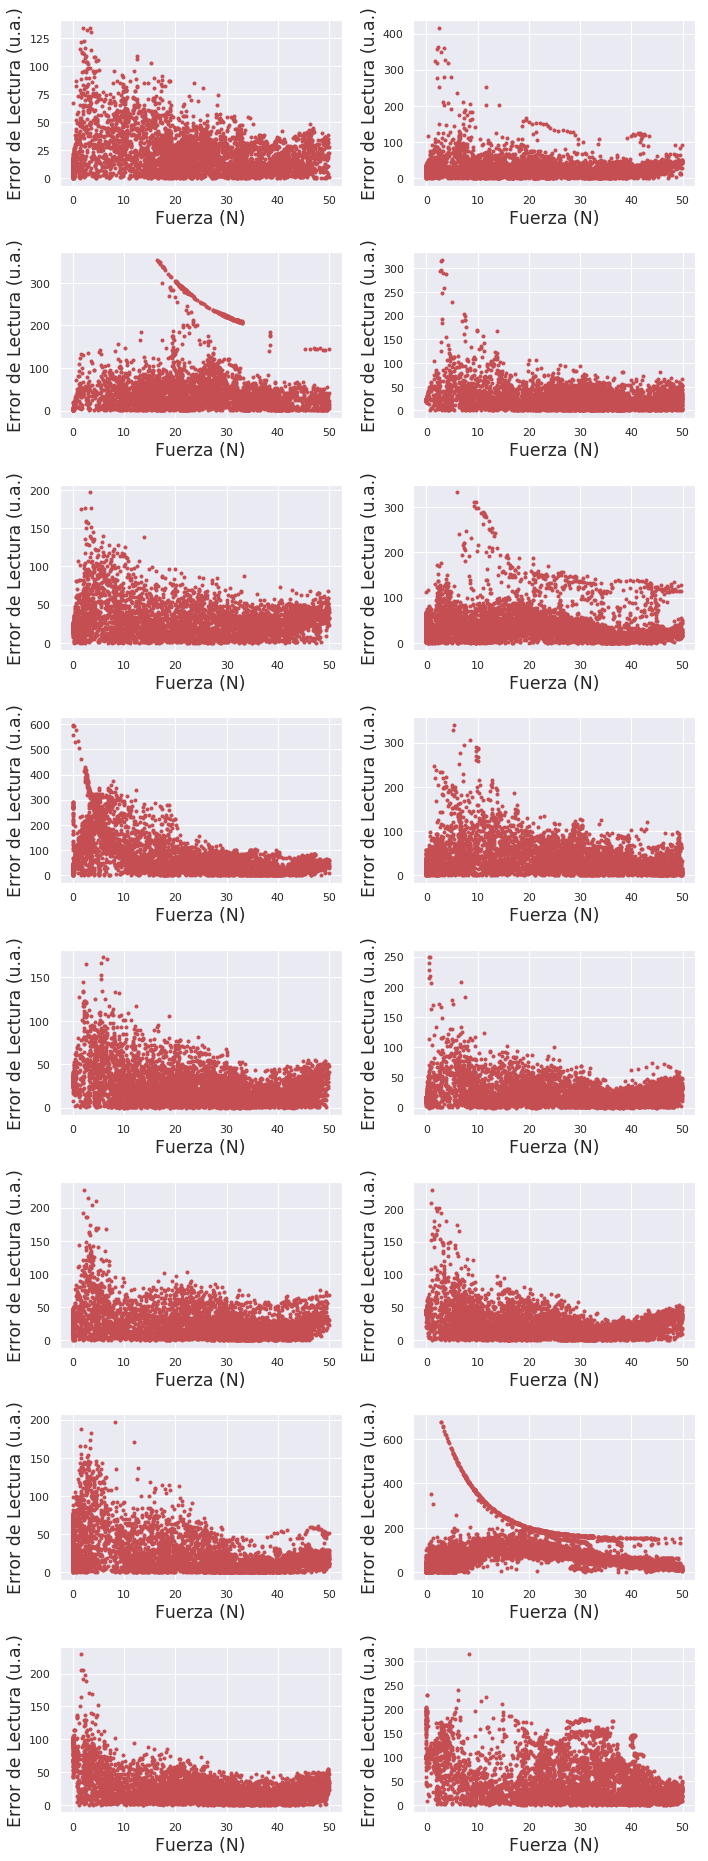

In [0]:
plt.figure(figsize=(10,26))
for t in range(16):
  plt.subplot(8,2,t+1)
  #plt.plot(Fv_s6, errs6, 'g.')
  plt.plot(Fuerza_V[t], errs16[t], 'r.', label=label[t])
  #plt.plot(Fv_s6, errs6, '.')
  plt.grid()
  plt.xlabel('Fuerza (N)', fontsize='x-large')
  plt.ylabel('Error de Lectura (u.a.)', fontsize='x-large')
  #plt.ylim(0,1000)
  #plt.legend(fontsize='x-large')
  plt.tight_layout()
  plt.grid()
#plt.savefig('errors6.png')
plt.show()

In [0]:
#np.array(Fuerza_V[0])[np.where(Lectura_S[0]==20)[0]]

In [0]:
"""
for i in range(16):
  for j in range(1024):
    if len(np.where(Lectura_S[i]==j)[0][:])==0:
      
      print('sensor'+ str(i) + 'Lectura' + str(j))
"""

"\nfor i in range(16):\n  for j in range(1024):\n    if len(np.where(Lectura_S[i]==j)[0][:])==0:\n      \n      print('sensor'+ str(i) + 'Lectura' + str(j))\n"

In [0]:
"""
parametros = []
covarianza = []
for i in range(16):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_V[i],Voltaje_S[i], p0=[  0,   5,  2], sigma=err_S*np.ones(len(Voltaje_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

#print(d,e,f)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

xp=np.linspace(0,50,1001)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))

banda_u = []
banda_l = []

for j in range(16):
  banda_u_aux = []
  banda_l_aux = []
  for i in range(len(xp)):
    yp[i],sigma_yp[i]=prediccion_exp(xp[i],0.1,parametros[j],covarianza[j])
    banda_u_aux.append(yp[i]+sigma_yp[i])
    banda_l_aux.append(yp[i]-sigma_yp[i])
  banda_u.append(banda_u_aux)
  banda_l.append(banda_l_aux)
"""

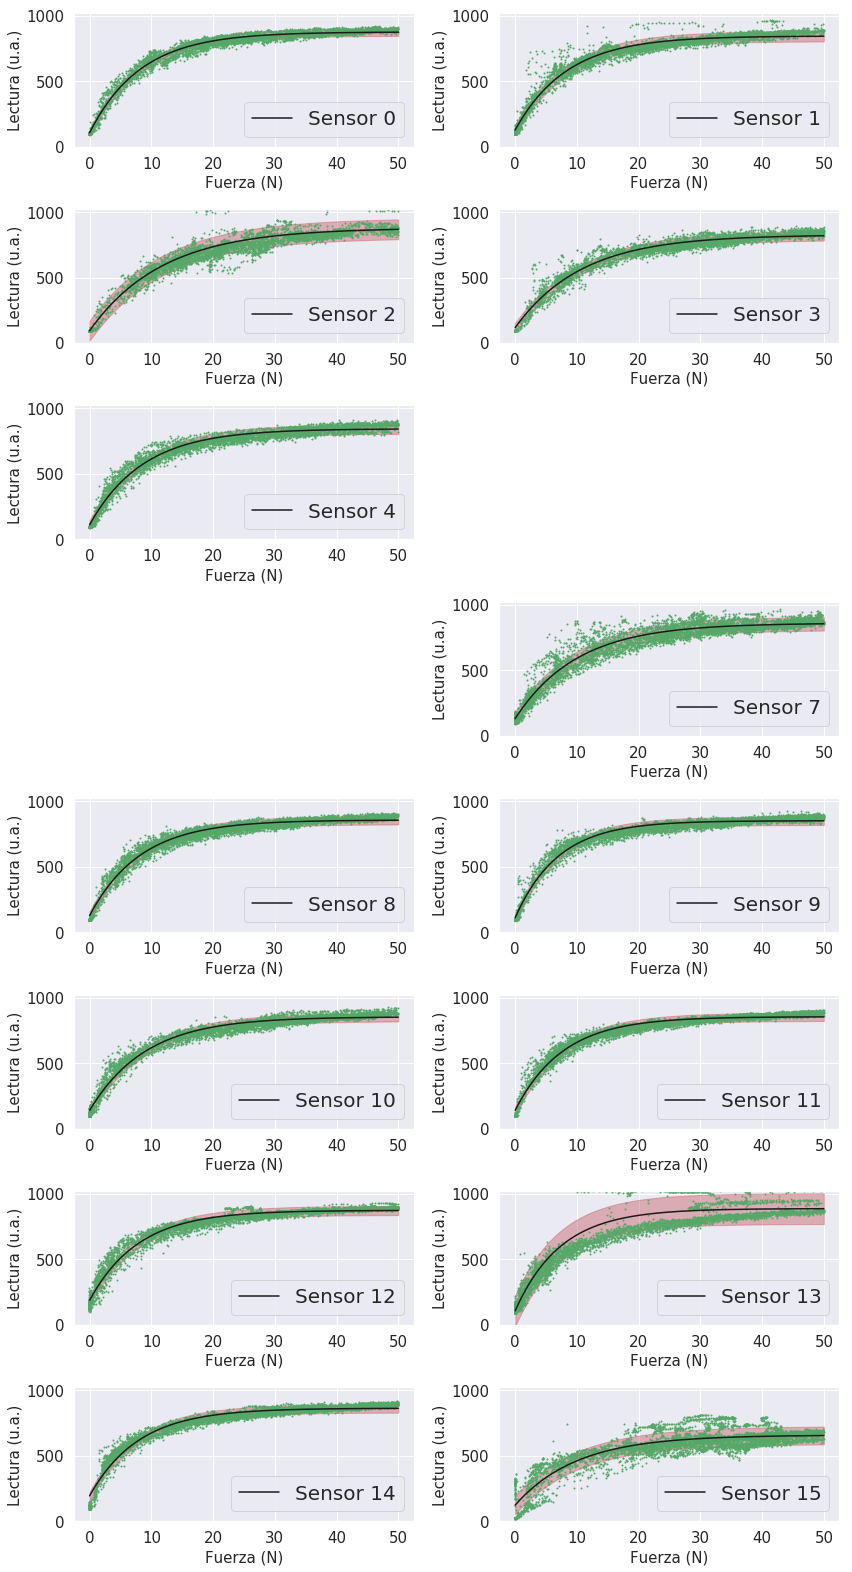

In [0]:
ms=2
plt.figure(figsize=(12,22))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in [0,1,2,3,4,7,8,9,10,11,12,13,14,15]: #]:#,]:
  plt.subplot(8,2,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label=label[i])
  plt.fill_between(xp, expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i], expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i], color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,1023)
  plt.grid()
  plt.tight_layout()

"""
plt.subplot(8,2,5+1) #Sensor 5
i=5
plt.plot(Fv_s5, Vs_s5, 'g.', markersize=ms)
plt.plot(xp, pred_s5, 'k-', label=label[i])
plt.fill_between(xp, err_low_s5, err_up_s5, color='r', alpha=0.4)
#plt.rc('legend', fontsize=25)
plt.grid()
plt.legend()
plt.xticks([0,10,20,30,40, 50])
#plt.yticks([1,2,3,4,5])
plt.xlabel('Fuerza (N)')
plt.ylabel('Lectura (u.a.)')
#plt.rc('axes', labelsize=35)
#plt.rc('xtick', labelsize=35)
#plt.rc('ytick', labelsize=35)
plt.ylim(0,1023)
plt.grid()
plt.tight_layout()
  
plt.subplot(8,2,6+1) #Sensor 6
i=6
plt.plot(Fv_s6, Vs_s6, 'g.', markersize=ms)
plt.plot(xp, pred_s6, 'k-', label=label[i])
plt.fill_between(xp, err_low_s6, err_up_s6, color='r', alpha=0.4)
plt.grid()
plt.legend()
plt.xticks([0,10,20,30,40, 50])
plt.xlabel('Fuerza (N)')
plt.ylabel('Lectura (u.a.)')
plt.grid()
#plt.rc('axes', labelsize=35)
#plt.rc('xtick', labelsize=35)
#plt.rc('ytick', labelsize=35)
plt.ylim(0,1023)
plt.grid()
plt.tight_layout()
#plt.grid()
"""


#plt.savefig('cal16s_todas_2dos8.png')
#plt.grid()  
plt.show()

In [0]:
err_porc = []
for j in range(16):
  err_porc.append(round(100*sigma_sensores[j]/min(Lectura_S[j]),0))
  
err_porc[5] = round(100*sigma_sensores[5]/min(Vs_s5),0)
err_porc[6] = round(100*sigma_sensores[6]/min(Vs_s5),0)

print(err_porc)

[31.0, 43.0, 83.0, 40.0, 40.0, 29.0, 68.0, 55.0, 35.0, 35.0, 36.0, 35.0, 35.0, 126.0, 36.0, 325.0]


28.50743680486602


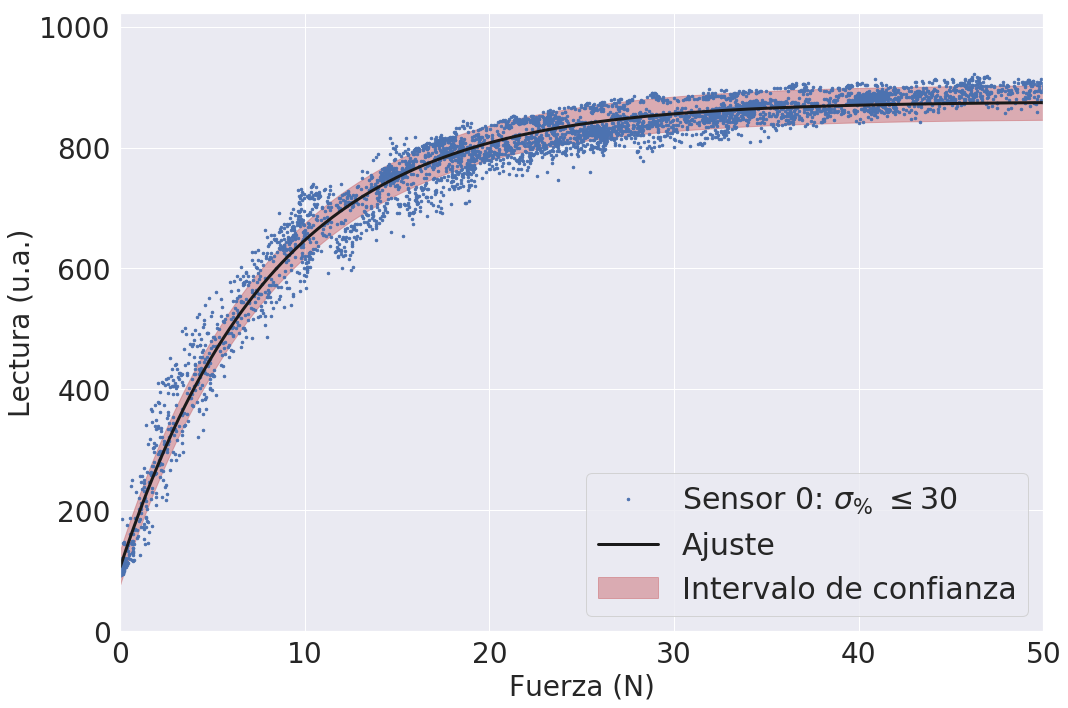

In [0]:
i = 0
print(sigma_sensores[i])
err_porc = int(100*sigma_sensores[i]/min(Lectura_S[i]))
plt.figure(figsize=(15,10))
plt.rc('legend', fontsize=30)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
#plt.errorbar(Fuerza_V[i], Lectura_S[i],yerr=sigma_sensores[i], fmt='bo', ecolor='y', markersize=4, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
plt.plot(Fuerza_V[i], Lectura_S[i], 'b.', markersize=5, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
#plt.plot(Fv_s5, Vs_s5, 'g.', label=r'$\sigma_{\%} \ \leq$'+str(err_porc))
plt.fill_between(xp, expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i], expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i], color='r', alpha=0.4, label='Intervalo de confianza')
plt.grid()

plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', linewidth=3, label='Ajuste')
plt.legend(loc='lower right')
plt.xticks([0,10,20,30,40, 50])
#plt.yticks([1,2,3,4,5])
plt.xlabel('Fuerza (N)')
plt.ylabel('Lectura (u.a.)')
plt.xlim(0,50)
plt.ylim(0,1023)
plt.grid()
plt.tight_layout()
#plt.savefig('calib_crudo_s'+str(i)+'.png')
#plt.savefig('calib_s'+str(i)+'.png')
plt.show()

In [0]:
plt.figure(figsize=(16,9))

plt.errorbar(Fuerza_ordenada[i+2], Voltaje_ordenado[i+2],yerr=Error_ordenado[i+2],fmt= 'o',color='red',alpha=0.5, label=label[i+2])

#plt.errorbar(Fuerza_ordenada[i], Voltaje_ordenado[i], yerr=Error_ordenado[i], fmt='b.', label=label[i])

#plt.plot(Fuerza_ordenada[i+2], Voltaje_ordenado[i+2],'o',color='orange', label=label[i+2])

#plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'b.', label=label[i])

plt.plot(xp,expo(xp,parametros[i+2][0],parametros[i+2][1],parametros[i+2][2]), fmt[i+2],color='black',linewidth=4, label='Ajuste exponencial')

#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i],linewidth=5, label='Ajuste telgopor')

plt.grid()
plt.ylim((0,5))
plt.xlim((0,50))
#plt.plot(x_p,pol(x_p,coef[i][0],coef[i][1],coef[i][2],coef[i][3],coef[i][4],coef[i][5]), fmt[i], label=label[i])
plt.grid()
plt.xlabel('Fuerza (N)')
plt.ylabel('Voltaje (V)')
plt.rc('axes', labelsize=35)
plt.rc('xtick', labelsize=35)
plt.rc('ytick', labelsize=35)

In [0]:
import scipy

In [0]:
chisq=[]
p_value=[]
p_v=[]
for i in range(16):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

[5.535226774625998e-115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
#Script para graficar con dos escalas distintas
"""
for i in range(12):  
  plt.figure(figsize=(10,7))
  fig, ax1 = plt.subplots(figsize=(10,7))
  num=i

  color = 'tab:blue'
  ax1.set_xlabel('Tiempo (s)')
  ax1.set_ylabel('Fuerza Vernier (N)', color=color)
  ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0,50)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:orange'
  ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
  ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim(0,5)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.grid()
  plt.xlim(0,60)
  plt.show()
"""

"\nfor i in range(12):  \n  plt.figure(figsize=(10,7))\n  fig, ax1 = plt.subplots(figsize=(10,7))\n  num=i\n\n  color = 'tab:blue'\n  ax1.set_xlabel('Tiempo (s)')\n  ax1.set_ylabel('Fuerza Vernier (N)', color=color)\n  ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)\n  ax1.tick_params(axis='y', labelcolor=color)\n  ax1.set_ylim(0,50)\n\n  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\n\n  color = 'tab:orange'\n  ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1\n  ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)\n  ax2.tick_params(axis='y', labelcolor=color)\n  ax2.set_ylim(0,5)\n  fig.tight_layout()  # otherwise the right y-label is slightly clipped\n  ax1.grid()\n  plt.xlim(0,60)\n  plt.show()\n"